In [170]:
from sympy import *
from sympy.plotting import plot

x = Symbol("x")
f = (x ** 2 + 3) / (3 * (x + 1))
f

In [90]:
# 1. Определить корни
#    Нули функции

solveset(f, x)

In [26]:
# 2. Найти интервалы, на которых функция возрастает
# 3. Найти интервалы, на которых функция убывает

f_diff = [-oo, oo] 
f_diff[1:1] = solve(diff(f), x)

incr_list = []
decr_list = []

for i in range(1, len(f_diff)):
    val = is_increasing(f, Interval.open(f_diff[i - 1], f_diff[i]))
    if val:
        incr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")
    else:
        decr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")

print(f"Убывает на интервалах:", *decr_list, sep="\n")
print(f"Возрастает на интервалах:", *incr_list, sep="\n")

Убывает на интервалах:
[-3, 1]
Возрастает на интервалах:
[-oo, -3]
[1, oo]


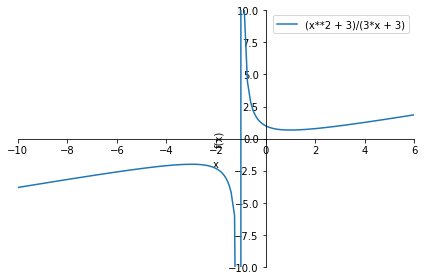

In [171]:
plot(f, legend=True, xlim=(-10, 6), ylim=(-10, 10))

In [28]:
# 5. Вычислить вершину
#    Экстремумы функции

ext_list = solve(diff(f), x)

for i in ext_list:
    res = f.subs(x, i)
    if res < 0:
        print(f"Точка минимума: (x:{i}, y:{res})")
    elif res > 0:
        print(f"Точка максимума: (x:{i}, y:{res})")

Точка минимума: (x:-3, y:-2)
Точка максимума: (x:1, y:2/3)


In [174]:
roots_fun = [-oo, oo]
answ = solve(f, x)
roots_fun[1:1] = answ
incr_list = []
decr_list = []

for i in range(1, len(roots_fun)):
    num_1, num_2 = roots_fun[i - 1], roots_fun[i]
    if type(num_1) == Mul and type(num_2) == Mul:
        continue
    elif type(num_2) == Mul:
        num_1 = roots_fun[i - 1]
        num_2 = solve(f'({f})**(-1)')[0]
        val = is_increasing(f, Interval(num_1, num_2))
    elif type(num_1) == Mul:
        num_2 = roots_fun[i]
        num_1 = solve(f'({f})**(-1)')[0]
        val = is_increasing(f, Interval(num_1, num_2))
        print(val)
    if val:
        incr_list.append(f"[{num_1}, {num_2}]")
    else:
        decr_list.append(f"[{num_1}, {num_2}]")

print("f > 0:", *incr_list, sep="\n")
print("f < 0:", *decr_list, sep="\n")

None
f > 0:
f < 0:
[-oo, -1]
[-1, oo]
